##  Spike Count and ISI distribution

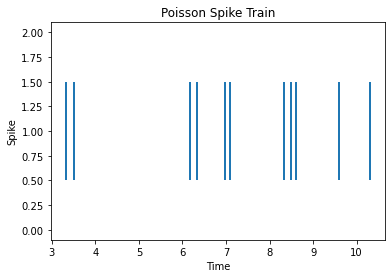

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import poisson

rate = 1  
T = 10    

num_spikes = np.random.poisson(rate * T)
isi = np.random.exponential(1/rate, num_spikes)
spike_times = np.cumsum(isi)


plt.eventplot(spike_times, linewidths=2)
plt.title('Poisson Spike Train')
plt.xlabel('Time')
plt.ylabel('Spike')
plt.show()


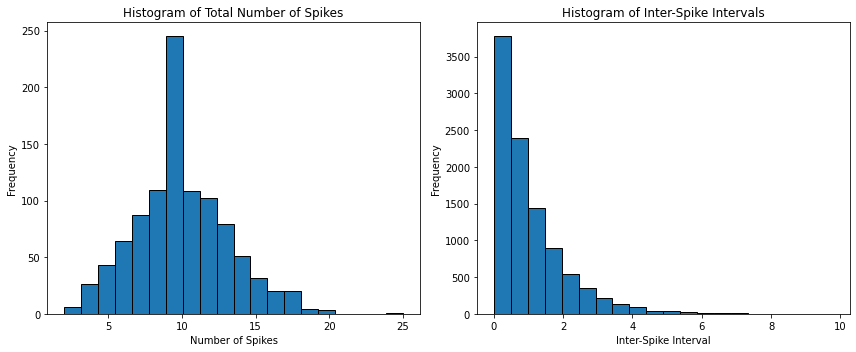

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_poisson_spike_train(rate, T, num_simulations=1000):
    num_spikes_list = []
    isi_list = []

    for _ in range(num_simulations):
        num_spikes = np.random.poisson(rate * T)
        isi = np.random.exponential(1 / rate, num_spikes)

        num_spikes_list.append(num_spikes)
        isi_list.extend(isi)

    return num_spikes_list, isi_list

def plot_histograms(num_spikes_list, isi_list):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(num_spikes_list, bins=20, edgecolor='black')
    plt.title('Histogram of Total Number of Spikes')
    plt.xlabel('Number of Spikes')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(isi_list, bins=20, edgecolor='black')
    plt.title('Histogram of Inter-Spike Intervals')
    plt.xlabel('Inter-Spike Interval')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

rate = 1  
T = 10    
num_simulations = 1000


num_spikes_list, isi_list = simulate_poisson_spike_train(rate, T, num_simulations)
plot_histograms(num_spikes_list, isi_list)


### The distributions are as expected,. For the number of spikes, the distribution is Poissonian, as given by $P(n) = e^{-r\tau} \frac{{rT}^n}{n!}$ and the ISI distribution is decaying exponentially, as given by $P(|s| = \tau) = r e^{-r\tau}$. 

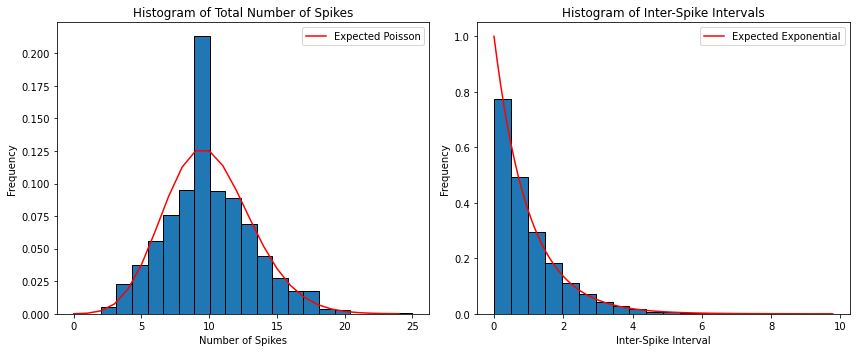

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(num_spikes_list, bins=20, density=True, edgecolor='black')

x_poisson = np.arange(0, max(num_spikes_list))
plt.plot(x_poisson, poisson.pmf(x_poisson, rate * T), 'r-', label='Expected Poisson')

plt.title('Histogram of Total Number of Spikes')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(isi_list, bins=20, density=True, edgecolor='black')

x_exponential = np.linspace(0, max(isi_list), 100)
plt.plot(x_exponential, expon.pdf(x_exponential, scale=1 / rate), 'r-', label='Expected Exponential')

plt.title('Histogram of Inter-Spike Intervals')
plt.xlabel('Inter-Spike Interval')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()